In [1]:
from neural_network.neuralNetwork import neuralNetwork
import numpy

In [2]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
#learning rate is 0.3
learning_rate = 0.3
#create instance of neural network
n  = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)


wih=
[[ 0.09510161 -0.03536081 -0.06346976 ...  0.13625749  0.07333355
  -0.06038811]
 [-0.06964294 -0.09083263 -0.13328125 ... -0.06033013  0.09731844
   0.16186621]
 [ 0.00861542  0.12758712  0.04737267 ...  0.00315137  0.0212915
  -0.00541187]
 ...
 [ 0.01600755  0.06002763 -0.05860097 ... -0.05063817 -0.05278349
   0.05782672]
 [ 0.04074278 -0.26450492  0.03205695 ...  0.21747566  0.14097991
   0.12962858]
 [ 0.11815343  0.05045225  0.09113844 ... -0.0119683  -0.11483457
  -0.05962641]]
who=
[[-1.71767823e-01  4.42947150e-02 -2.25820010e-01  2.76486913e-01
   1.13926997e-01  4.81878562e-01 -3.32737749e-02  2.89448984e-01
   4.87146670e-02  1.39887494e-02 -4.48558766e-01  1.28672120e-01
  -6.59315318e-01  3.23850547e-02  6.99248618e-02  6.51793511e-01
  -2.30393300e-01 -8.29030238e-01 -8.80035035e-02 -3.10954669e-01
   1.17083809e-01 -1.23289454e-01 -8.19140952e-02 -1.34359773e-01
   8.09615038e-02 -5.47589023e-01  8.22605185e-03 -2.42361045e-01
  -1.42365071e-01 -3.30391372e-02 -4.

In [3]:
#load the mnist training data csv file into a list
training_data_file = open("mnist_train_100.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [4]:
print('start')
# go through all records in the training data set
for record in training_data_list:
    
    # split the record by the ',' commas
    all_values = record.split(',')
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    #create the target output values (all 0.01,except the desired label which is  0.99)
    targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs,targets)
    pass
print('done')

start
done


In [5]:
#load the mnist test data csv file into a list
test_data_file = open("mnist_test_10.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [6]:
# get the first test record
all_values = test_data_list[0].split(',')
# print the label
print(all_values[0])

7


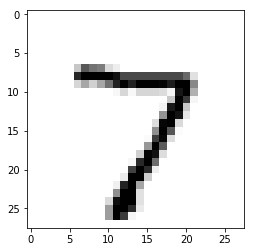

In [8]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
import matplotlib.pyplot
matplotlib.pyplot.imshow(image_array,cmap="Greys",interpolation="None")

In [11]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.03808485],
       [0.01861076],
       [0.0253163 ],
       [0.07835774],
       [0.04981721],
       [0.01610368],
       [0.00527374],
       [0.79040177],
       [0.02254922],
       [0.03200705]])

In [12]:
# test the neural network
# scorecard for how well the network performs, initially empty 
scorecard = []
# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    print(correct_label,"correct label")
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    print(label,"network's answer")
    # append correct or incorrect to list
    if (label == correct_label):
        #network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        #network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

7 correct label
7 network's answer
2 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
3 network's answer
5 correct label
4 network's answer
9 correct label
7 network's answer


In [13]:
scorecard

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]

In [14]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print("performance = ",scorecard_array.sum() / scorecard_array.size)

performance =  0.6
